#Training an image classifier
We will do the following steps in order:

- Load and normalize the CIFAR10 training and test datasets using torchvision

- Define a Convolutional Neural Network

- Define a loss function

- Train the network on the training data

- Test the network on the test data



## 1. Load and normalize CIFAR10

In [13]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.4))
    ]
)

batch_size = 4

trainSet = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainSet, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
trainSet

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.4))
           )

In [16]:
trainloader

In [17]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

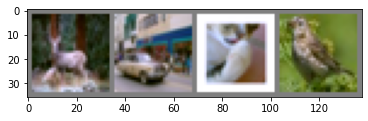

deer  car   cat   bird 


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [19]:
images.type()

'torch.FloatTensor'

In [20]:
images.shape

torch.Size([4, 3, 32, 32])

In [21]:
torchvision.utils.make_grid(images).shape

torch.Size([3, 36, 138])

## 2. Define a Convolutional Neural Network

In [22]:
import torch.nn  as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(input=x, start_dim=1, end_dim=-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = Net()

## 3. Define a Loss function and optimizer

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)

## 4. Train the network

In [27]:
n_epochs = 5

print("strat Training")
for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


strat Training
[1,  2000] loss: 0.703
[1,  4000] loss: 0.722
[1,  6000] loss: 0.750
[1,  8000] loss: 0.767
[1, 10000] loss: 0.787
[1, 12000] loss: 0.775
[2,  2000] loss: 0.677
[2,  4000] loss: 0.711
[2,  6000] loss: 0.725
[2,  8000] loss: 0.745
[2, 10000] loss: 0.754
[2, 12000] loss: 0.730
[3,  2000] loss: 0.668
[3,  4000] loss: 0.694
[3,  6000] loss: 0.721
[3,  8000] loss: 0.731
[3, 10000] loss: 0.752
[3, 12000] loss: 0.754
[4,  2000] loss: 0.611
[4,  4000] loss: 0.660
[4,  6000] loss: 0.694
[4,  8000] loss: 0.730
[4, 10000] loss: 0.740
[4, 12000] loss: 0.751
[5,  2000] loss: 0.629
[5,  4000] loss: 0.656
[5,  6000] loss: 0.688
[5,  8000] loss: 0.697
[5, 10000] loss: 0.725
[5, 12000] loss: 0.736
Finished Training


In [28]:
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

## 5. Test the network on the test data

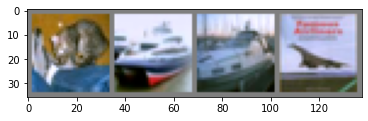

GroundTruth:  cat   ship  ship  plane


In [29]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [30]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
print(outputs)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

tensor([[ -2.6529,  -0.0340,   1.8341,   3.5299,  -1.7962,   4.6185,   4.6384,
          -3.1754,  -0.3466,  -4.3410],
        [  9.9949,  17.5309,  -4.9319,  -5.8976,  -3.9154, -14.5405, -12.2165,
          -5.8687,  13.1643,   8.3285],
        [  3.3759,   4.2618,  -0.5070,  -1.1593,  -1.7654,  -5.1677,  -3.9942,
          -3.5166,   5.6821,   3.4085],
        [  4.4580,   1.2537,   1.4612,  -0.8680,  -1.2973,  -4.1698,  -5.7982,
          -1.8939,   5.7483,   2.5888]], grad_fn=<AddmmBackward0>)
Predicted:  frog  car   ship  ship 


In [31]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [32]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.5 %
Accuracy for class: car   is 65.2 %
Accuracy for class: bird  is 42.6 %
Accuracy for class: cat   is 49.3 %
Accuracy for class: deer  is 52.0 %
Accuracy for class: dog   is 44.0 %
Accuracy for class: frog  is 77.4 %
Accuracy for class: horse is 67.2 %
Accuracy for class: ship  is 72.9 %
Accuracy for class: truck is 75.1 %


## 6. Training on GPU

In [34]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [35]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

In [36]:
del dataiter